# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [2]:
ID = 328081248
sectors = np.array([54])

period = 4.1647720505 
tdepth = 0.0020526791415986048

lc_file = "TOI_5799_S54.csv"
contrastcurve_file = "TOI_5799_BrGamma.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

Sector 54


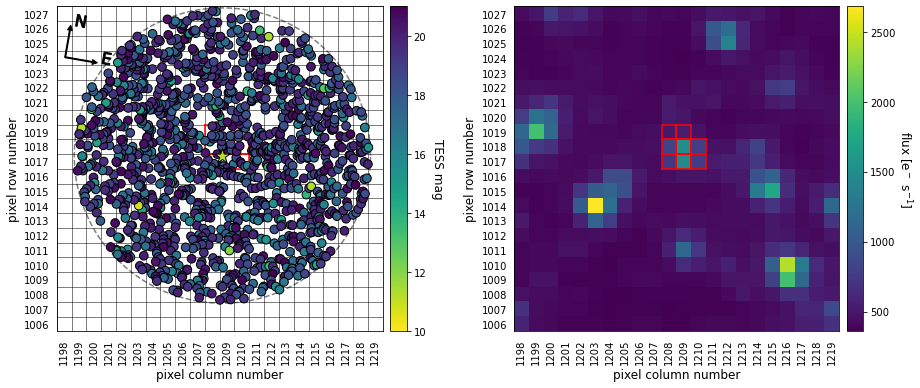

ID     Tmag    Jmag    Hmag    Kmag          ra        dec  \
0      328081248  11.1798   9.742   9.192   8.952  301.629383  15.988090   
1     1940606733  20.3284     NaN     NaN     NaN  301.627315  15.988290   
2     1940606734  20.6761     NaN     NaN     NaN  301.629492  15.990631   
3     1940606723  20.1194     NaN     NaN     NaN  301.629053  15.991675   
4     1940606715  18.4499     NaN     NaN     NaN  301.628555  15.991636   
...          ...      ...     ...     ...     ...         ...        ...   
1331  1940610324  18.2706     NaN     NaN     NaN  301.675884  16.022073   
1332  1940606411  20.8199     NaN     NaN     NaN  301.590946  15.945720   
1333   328081154  17.3053  16.479  16.045  15.656  301.682021  16.012616   
1334  1940609675  18.4348     NaN     NaN     NaN  301.687643  15.983054   
1335  1940610204  18.6175     NaN     NaN     NaN  301.681313  16.014002   

         mass       rad    Teff        plx  sep (arcsec)  PA (E of N)  
0     0.32653  0.343358  3521.0  35.926400         0.000        0.000  
1         NaN       NaN     NaN        NaN         7.193      275.740  
2         NaN       NaN     NaN        NaN         9.153        2.345  
3         NaN       NaN     NaN  -0.637649        12.957      354.936  
4     0.73000  0.881793  4618.0   0.162616        13.083      347.346  
...       ...       ...     ...        ...           ...          ...  
1331  0.94000  0.609638  5409.0   0.288533       202.139       52.749  
1332      NaN       NaN     NaN        NaN       202.398      221.099  
1333  0.83000  1.009320  5008.0   0.335316       202.425       64.133  
1334  0.64000  1.053630  4103.0   0.273082       202.438       95.130  
1335  0.88000  0.706801  5190.0  -0.017353       202.472       62.559  

[1336 rows x 13 columns]

In [4]:
ap54 = np.array([[1208, 1017],[1209, 1017],[1210, 1017],[1208, 1018],
                 [1209, 1018],[1210, 1018],[1208, 1019],[1209, 1019]])

apertures = np.array([ap54])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

# Check Nearby Region

In [5]:
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)
target.stars

ID     Tmag    Jmag    Hmag    Kmag          ra        dec  \
0      328081248  11.1798   9.742   9.192   8.952  301.629383  15.988090   
1     1940606733  20.3284     NaN     NaN     NaN  301.627315  15.988290   
2     1940606734  20.6761     NaN     NaN     NaN  301.629492  15.990631   
3     1940606723  20.1194     NaN     NaN     NaN  301.629053  15.991675   
4     1940606715  18.4499     NaN     NaN     NaN  301.628555  15.991636   
...          ...      ...     ...     ...     ...         ...        ...   
1331  1940610324  18.2706     NaN     NaN     NaN  301.675884  16.022073   
1332  1940606411  20.8199     NaN     NaN     NaN  301.590946  15.945720   
1333   328081154  17.3053  16.479  16.045  15.656  301.682021  16.012616   
1334  1940609675  18.4348     NaN     NaN     NaN  301.687643  15.983054   
1335  1940610204  18.6175     NaN     NaN     NaN  301.681313  16.014002   

         mass       rad    Teff        plx  sep (arcsec)  PA (E of N)  \
0     0.32653  0.343358  3521.0  35.926400         0.000        0.000   
1         NaN       NaN     NaN        NaN         7.193      275.740   
2         NaN       NaN     NaN        NaN         9.153        2.345   
3         NaN       NaN     NaN  -0.637649        12.957      354.936   
4     0.73000  0.881793  4618.0   0.162616        13.083      347.346   
...       ...       ...     ...        ...           ...          ...   
1331  0.94000  0.609638  5409.0   0.288533       202.139       52.749   
1332      NaN       NaN     NaN        NaN       202.398      221.099   
1333  0.83000  1.009320  5008.0   0.335316       202.425       64.133   
1334  0.64000  1.053630  4103.0   0.273082       202.438       95.130   
1335  0.88000  0.706801  5190.0  -0.017353       202.472       62.559   

         fluxratio    tdepth  
0     9.101928e-01  0.002255  
1     1.902536e-04  0.000000  
2     1.541850e-04  0.000000  
3     2.554992e-04  0.000000  
4     1.181666e-03  0.000000  
...            ...       ...  
1331  1.454724e-28  0.000000  
1332  1.548178e-33  0.000000  
1333  8.077693e-29  0.000000  
1334  1.792344e-30  0.000000  
1335  2.982783e-29  0.000000  

[1336 rows x 15 columns]

In [6]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(i,"",target.stars['ID'][i])

10  328081257
26  328081228
40  328081289
51  328081255
60  328081222
101  328081223
112  328081200
156  328081252
176  328081182


In [7]:
target.stars['tdepth'][10] = 0
target.stars['tdepth'][26] = 0
target.stars['tdepth'][40] = 0
target.stars['tdepth'][60] = 0
target.stars['tdepth'][112] = 0
target.stars['tdepth'][156] = 0
target.stars['tdepth'][176] = 0

C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_25360\1482387024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][10] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_25360\1482387024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['tdepth'][26] = 0
C:\Users\Aniket Prasad\AppData\Local\Temp\ipykernel_25360\1482387024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.stars['

# Ploting CC File

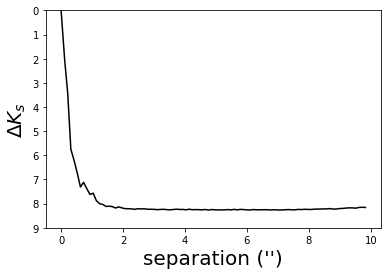

In [8]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

CPU times: total: 406 ms
Wall time: 427 ms


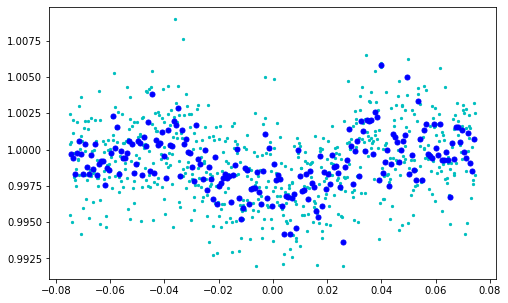

In [9]:
%%time

lc = pd.read_csv(lc_file, header=None)

# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/200
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

plt.scatter(time, flux, s = 5, c = 'c')
plt.scatter(lc.time.value, lc.flux.value, s = 25,  c = 'b')
fig=plt.gcf()
fig.set_size_inches(8,5)

In [10]:
for i in range(20):
    target.calc_probs(time = lc.time.value, 
                      flux_0 = lc.flux.value, 
                      flux_err_0 = np.mean(lc.flux_err.value), 
                      P_orb = P_orb,
                      contrast_curve_file = contrastcurve_file,
                      filt = band,
                      exptime = 0.0013888888888889,
                      parallel=True)

    print("FPP = ", target.FPP)
    print("NFPP = ", target.NFPP)

Calculating TP scenario probabilitiey for 328081248.
Calculating EB and EBx2P scenario probabilities for 328081248.
Calculating PTP scenario probability for 328081248.
Calculating PEB and PEBx2P scenario probabilities for 328081248.
Calculating STP scenario probability for 328081248.
Calculating SEB and SEBx2P scenario probabilities for 328081248.
Calculating DTP scenario probability for 328081248.
Calculating DEB and DEBx2P scenario probabilities for 328081248.
Calculating BTP scenario probability for 328081248.
Calculating BEB and BEBx2P scenario probabilities for 328081248.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081255.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 328081223.
FPP =  2.447598542099083e-05
NFPP =  2.5494785093202717e-28
Calculating TP scenario probabilitiey for 328081248.
Calculating EB and EBx2P scenario probabilities for 328081248.
Calculating PTP scenario probability for 328081248.
Calculating PEB and PEBx2P scenario probabilit

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  4.294719278186143e-05
NFPP =  2.694133055004364e-28


ID scenario       M_s       R_s     P_orb        inc         b  \
0   328081248       TP  0.326530  0.343358  4.164772  89.435798  0.222367   
1   328081248       EB  0.326530  0.343358  4.164772  85.838353  1.890862   
2   328081248    EBx2P  0.326530  0.343358  8.329544  88.512171  0.598776   
3   328081248      PTP  0.326530  0.343358  4.164772  89.692951  0.102400   
4   328081248      PEB  0.326530  0.343358  4.164772  85.986065  1.872268   
5   328081248   PEBx2P  0.326530  0.343358  8.329544  88.355764  0.871252   
6   328081248      STP  0.315073  0.330655  4.164772  89.316247  0.254559   
7   328081248      SEB  0.110037  0.133957  4.164772  88.158679  1.300668   
8   328081248   SEBx2P  0.106365  0.128960  8.329544  88.493613  0.191682   
9   328081248      DTP  0.326530  0.343358  4.164772  89.390264  0.259274   
10  328081248      DEB  0.326530  0.343358  4.164772  85.487725  1.780857   
11  328081248   DEBx2P  0.326530  0.343358  8.329544  88.418026  0.800781   
12  328081248      BTP  0.688000  0.634349  4.164772  87.434765  0.514349   
13  328081248      BEB  0.466000  0.407593  4.164772  89.306823  0.382074   
14  328081248   BEBx2P  0.533000  0.473040  8.329544  87.317007  1.722843   
15  328081255      NTP  0.740000  1.233900  4.164772  89.937842  0.009238   
16  328081255      NEB  0.740000  1.233900  4.164772  89.876987  0.020036   
17  328081255   NEBx2P  0.740000  1.233900  8.329544  89.981127  0.002259   
18  328081223      NTP  1.040000  3.307900  4.164772  89.225740  0.050667   
19  328081223      NEB  1.040000  3.307900  4.164772  89.606998  0.028591   
20  328081223   NEBx2P  1.040000  3.307900  8.329544  89.980679  0.002250   

             ecc           w        R_p      M_EB      R_EB          prob  
0   1.016988e-01  335.260610   1.853198  0.000000  0.000000  8.912678e-01  
1   7.521833e-02   28.611567   0.000000  0.299996  0.317859  7.031936e-28  
2   6.745724e-01  177.441419   0.000000  0.321978  0.336487  3.391424e-06  
3   1.506884e-01   51.161645   1.911129  0.000000  0.000000  8.898720e-04  
4   4.766000e-02   20.770303   0.000000  0.307882  0.324563  4.152140e-30  
5   5.065986e-01  173.012209   0.000000  0.311878  0.327951  6.609743e-08  
6   5.646921e-02   57.406643   2.579463  0.000000  0.000000  2.426158e-05  
7   5.737581e-02  107.717801   0.000000  0.036091  0.100000  5.175878e-24  
8   9.331733e-01  153.386615   0.000000  0.106281  0.128844  1.423682e-10  
9   1.437067e-01  302.035911   1.853727  0.000000  0.000000  1.077994e-01  
10  1.919377e-01   57.002820   0.000000  0.309588  0.326009  1.939563e-31  
11  5.785517e-01  179.805735   0.000000  0.326160  0.340010  2.958071e-06  
12  4.155142e-01   12.709179  15.537138  0.000000  0.000000  9.624769e-06  
13  4.017772e-01  259.779425   0.000000  0.152402  0.184119  1.373959e-06  
14  8.288601e-03   95.029745   0.000000  0.513314  0.473040  1.271153e-06  
15  1.771299e-01  211.151295  19.990927  0.000000  0.000000  4.131592e-43  
16  5.788613e-01  328.980453   0.000000  0.648053  0.671066  1.815693e-28  
17  6.717473e-01   23.443036   0.000000  0.703721  0.734701  8.784397e-29  
18  1.269307e-01  281.267078  19.997865  0.000000  0.000000  6.164264e-43  
19  4.308001e-05  154.218231   0.000000  0.987999  1.061706  3.367374e-39  
20  4.361764e-07    7.411104   0.000000  1.039995  1.137250  1.010711e-38

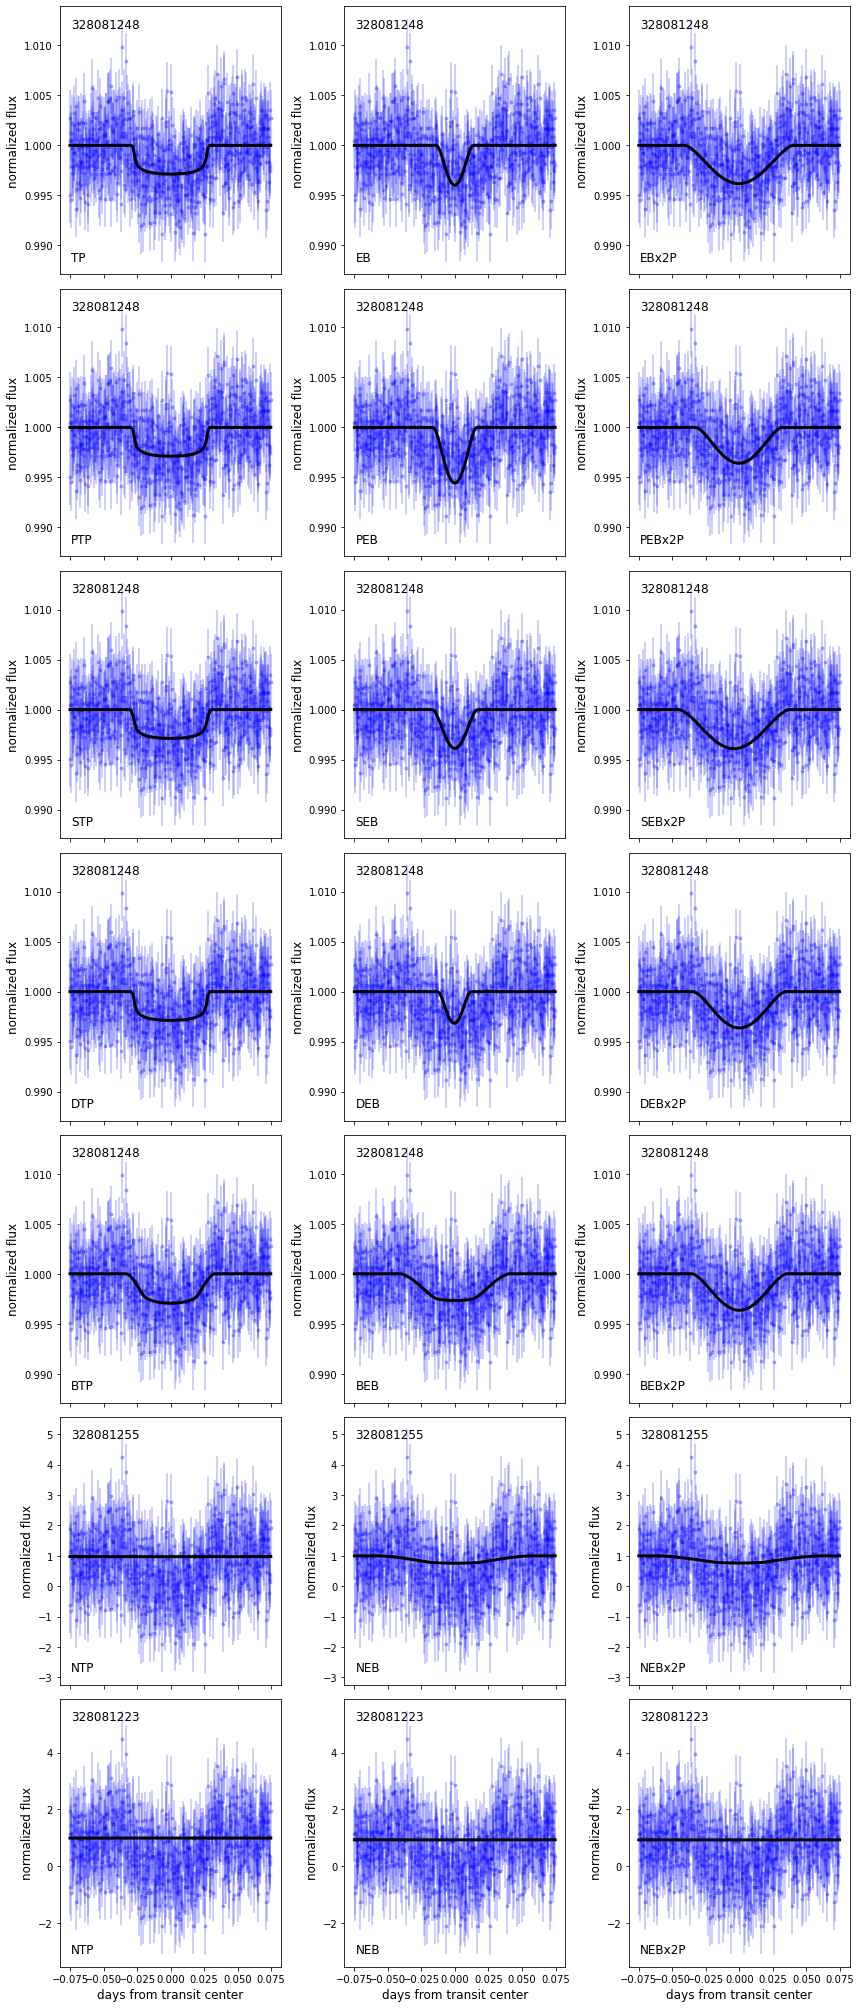

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))

In [18]:
FPP=np.array([2.4476E-05,
5.75665E-05,
5.85129E-05,
2.62291E-05,
3.82282E-05,
3.33602E-05,
4.04507E-05,
3.18616E-05,
3.29632E-05,
2.28366E-05,
0.000102738,
8.53014E-05,
3.25149E-05,
4.28365E-05,
7.14818E-05,
4.86587E-05,
5.06166E-05,
2.56612E-05,
4.23446E-05,
4.29472E-05])

NFPP=np.array([2.54948E-28,
2.692E-28,
2.59326E-28,
2.52172E-28,
2.76841E-28,
2.63354E-28,
2.67674E-28,
2.61298E-28,
2.77007E-28,
2.59116E-28,
2.65179E-28,
2.2921E-28,
2.70635E-28,
2.49091E-28,
2.65193E-28,
2.74446E-28,
2.83287E-28,
2.51225E-28,
2.46806E-28,
2.69413E-28])

print(np.mean(FPP),"+/-",np.std(FPP))
print(np.mean(NFPP),"+/-",np.std(NFPP))

4.5579295e-05 +/- 2.045489187310642e-05
2.6227104999999996e-28 +/- 1.2326364822911094e-29
